In [81]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
#MY ADD
from sqlalchemy.ext.declarative import declarative_base

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# MY ADD
conn = engine.connect()

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [ ]:
## EXPLORATORY CLIMATE ANALYSIS 
#  
# Goal: Design a query to retrieve the last 12 months of precipitation data and
# plot the results

# [prep work]
# 1. Calculate the date 1 year ago from the last data point in the database

# 2. Perform a query to retrieve the data and precipitation scores

# 3. Save the query results as a Pandas DataFrame and set the index to the 
# date column

# 4. Sort the dataframe by date

# 5. Use Pandas Plotting with Matplotlib to plot the data


In [12]:
# MY PREP WORK: explore data
# # Query All Records in the the Database
station_data = pd.read_sql("SELECT * FROM station", conn)
measurement_data = pd.read_sql("SELECT * FROM measurement", conn)

In [37]:
# MY PREP WORK: 
# Preview "Station"
station_data

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [13]:
# MY PREP WORK:
# Preview "Measurement"
measurement_data

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [ ]:
# GOAL: Design a query to retrieve the last 12 months of precipitation data and
# plot the results [select only the date and prcp values]

In [14]:
# 1. Calculate the date 1 year ago from the last data point in the database
# a. Calculate the last (most recent) recorded date:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [18]:
# b. Caculate the date 12 months prior to the last recorded date:
last_year = dt.date(2017,8,23)-dt.timedelta(365)
last_year

datetime.date(2016, 8, 23)

In [20]:
# 2. Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=last_year).all()
results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [26]:
# 3. Save the query results as a Pandas DataFrame and set the index to the 
# date column

results_df = pd.DataFrame(results)
revised_df = results_df.set_index(results_df["date"])
revised_df = revised_df[["prcp"]]
revised_df

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [28]:
## Explore Data
inspector = inspect(engine)
columns = inspector.get_columns('measurement')

inspector.get_table_names()


['measurement', 'station']

In [31]:
# 4. Sort the dataframe by date

revised_df = revised_df.sort_values("date")
revised_df

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


/Users/aaron/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


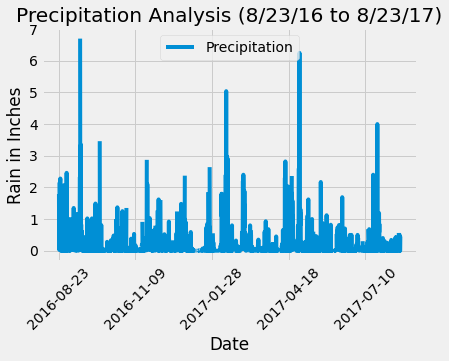

In [82]:
# 5. Use Pandas Plotting with Matplotlib to plot the data [ use the plot method]
# revised_df.plot(rot=90)
revised_df.plot()
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis (8/23/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()


In [33]:
# 6. Use Pandas to calculate and print the summary statistics for the precipitation data
revised_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
##STATION ANALYSIS

In [69]:
# 7. Design a query to show how many stations are available in this dataset?
locations = session.query(func.count(Station.station)).all()
print("There are {} stations.".format(locations))

There are [(9,)] stations.


In [55]:
# 10. What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [75]:
busiest = active_stations[0][0]    
print("The busiest Station was",busiest,"with",active_stations[0][1],"weather observations.")
print()
print("Here are all of the Stations (in descending order) with their number of observations:")
for station, count in active_stations:
    print("Station",station,"had",count, "weather observations.")

The busiest Station was USC00519281 with 2772 weather observations.

Here are all of the Stations (in descending order) with their number of observations:
Station USC00519281 had 2772 weather observations.
Station USC00519397 had 2724 weather observations.
Station USC00513117 had 2709 weather observations.
Station USC00519523 had 2669 weather observations.
Station USC00516128 had 2612 weather observations.
Station USC00514830 had 2202 weather observations.
Station USC00511918 had 1979 weather observations.
Station USC00517948 had 1372 weather observations.
Station USC00518838 had 511 weather observations.


In [44]:
# 11. Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station=="USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

In [ ]:
# 12. Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station 
# and plot the results as a histogram


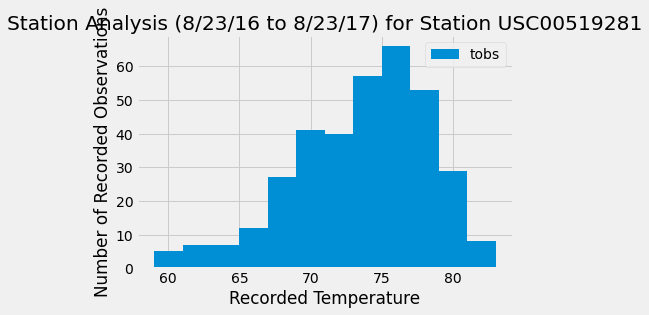

In [80]:
temperatures = session.query(Measurement.tobs).filter(Measurement.station=="USC00519281").\
    filter(Measurement.date>=last_year).all()
temp_df = pd.DataFrame(temperatures)
temp_df.plot.hist(bins=12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Number of Recorded Observations")
plt.title("Station Analysis (8/23/16 to 8/23/17) for Station " + busiest)
plt.show()

## Bonus Challenge Assignment

In [85]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
calc_temps('2012-02-28', '2012-03-05')


[(62.0, 69.57142857142857, 74.0)]

In [88]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# set my values
previous_start = '2017-04-28'
previous_return = '2017-05-05'

# My trip will be April 28 - May 05
vacation_temp = (calc_temps(previous_start, previous_return))
print(vacation_temp)

[(58.0, 72.625, 79.0)]


In [78]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


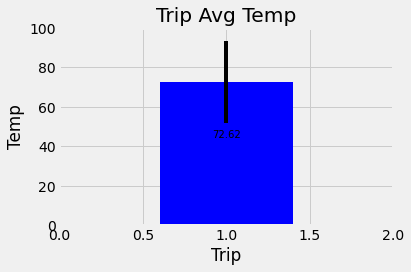

In [87]:
p2p = vacation_temp[0][2]-vacation_temp[0][0]
avgtemp = vacation_temp[0][1]
min_temp = vacation_temp[0][0]
max_temp = vacation_temp[0][2]

fig, ax = plt.subplots()
bar_chart = ax.bar(1 , avgtemp, color= 'blue', yerr=p2p)
ax.set_xlabel("Trip")
ax.set_ylabel("Temp")
ax.set_title("Trip Avg Temp")

def autolabels(rects):
    for rect in rects:
        h=rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .6*h,'%.2f' % float(h) ,ha='center', va='bottom', fontsize=10)

        
    # label the bars 
autolabels(bar_chart)        
plt.ylim(0, 100)
plt.xlim(0,2)
fig.tight_layout()
plt.show()

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using 
# the previous year's matching dates.




In [107]:
# query to pull the rain fall from last year matching this years trip
vacation_rain = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(Measurement.date >= previous_start).\
    filter(Measurement.date <= previous_return).\
    order_by(Measurement.station).all()
vacation_rain

[('USC00513117', '2017-04-28', 2.6, 70.0),
 ('USC00513117', '2017-04-29', 0.35, 66.0),
 ('USC00513117', '2017-04-30', 1.21, 61.0),
 ('USC00513117', '2017-05-01', 0.07, 68.0),
 ('USC00513117', '2017-05-02', 0.03, 73.0),
 ('USC00513117', '2017-05-03', 0.01, 74.0),
 ('USC00513117', '2017-05-04', 0.0, 77.0),
 ('USC00513117', '2017-05-05', 0.0, 78.0),
 ('USC00514830', '2017-04-28', 0.09, 77.0),
 ('USC00514830', '2017-04-29', 0.95, 71.0),
 ('USC00514830', '2017-04-30', 1.17, 63.0),
 ('USC00514830', '2017-05-01', 0.03, 78.0),
 ('USC00514830', '2017-05-02', 0.01, 76.0),
 ('USC00514830', '2017-05-03', 0.01, 78.0),
 ('USC00514830', '2017-05-04', 0.08, 77.0),
 ('USC00514830', '2017-05-05', 0.28, 78.0),
 ('USC00516128', '2017-04-28', 0.79, 71.0),
 ('USC00516128', '2017-04-29', 0.0, 68.0),
 ('USC00516128', '2017-04-30', 0.8, 58.0),
 ('USC00516128', '2017-05-01', 0.25, 73.0),
 ('USC00516128', '2017-05-02', 0.0, 79.0),
 ('USC00516128', '2017-05-04', None, 74.0),
 ('USC00516128', '2017-05-05', 0.1, 74

In [103]:
vacation_rain_df = pd.DataFrame(vacation_rain)
vacation_rain_df.head()

,station,date,prcp,tobs
0,USC00513117,2017-04-28,2.60,70.0
1,USC00513117,2017-04-29,0.35,66.0
2,USC00513117,2017-04-30,1.21,61.0
3,USC00513117,2017-05-01,0.07,68.0
4,USC00513117,2017-05-02,0.03,73.0


In [105]:
# Sort this in descending order by precipitation amount and list the station, name, 
# latitude, longitude, and elevation
vacation_data = vacation_rain_df.merge(station_data, on = 'station')
vacation_data.sort_values(by='prcp', ascending = False)

,station,date,prcp,tobs,id,name,latitude,longitude,elevation
41,USC00519523,2017-04-29,6.25,70.0,6,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
0,USC00513117,2017-04-28,2.60,70.0,2,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
42,USC00519523,2017-04-30,1.31,64.0,6,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
2,USC00513117,2017-04-30,1.21,61.0,2,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
10,USC00514830,2017-04-30,1.17,63.0,3,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
26,USC00519281,2017-04-30,1.04,60.0,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
9,USC00514830,2017-04-29,0.95,71.0,3,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
34,USC00519397,2017-04-30,0.89,63.0,1,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
18,USC00516128,2017-04-30,0.80,58.0,9,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
16,USC00516128,2017-04-28,0.79,71.0,9,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [106]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [116]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip

vacation_start = '2017-04-28'
vacation_return = '2017-05-05'


# Use the start and end date to create a range of dates

dates = session.query(Measurement.date).\
    filter(Measurement.date >= vacation_start).filter(Measurement.date <= vacation_return).\
    group_by(Measurement.date).all()

# List comprehension - get date from tuples
trip_dates = [day[0] for day in dates]

# Stip off the year and save a list of %m-%d strings with another list comprehension 
trip_dates_short= [day[5:] for day in trip_dates]

# Find the start month/day and the end month/day 
start_month_day = trip_dates_short[0]
end_month_day = trip_dates_short[-1]


#daily_normals = [session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs), 
    #func.max(Measurement.tobs)).filter(Measurement.date >= start_date).filter
    #(Measurement.date <= end_date).group_by(Measurement.date).all()]
    
# Loop through the list of %m-%d strings and calculate the normals for each date    
daily_normals = [session.query(func.min(Measurement.tobs),
                       func.avg(Measurement.tobs),
                       func.max(Measurement.tobs)).filter(func.strftime("%m-%d", Measurement.date) >= start_month_day).filter(func.strftime("%m-%d", Measurement.date) <= end_month_day).group_by(func.strftime("%m-%d", Measurement.date)).all()]

daily_normals = daily_normals[0]
print("Aggregate Daily Normals for 04-28 to 05-05")
daily_normals

Aggregate Daily Normals for 04-28 to 05-05


[(63.0, 73.46428571428571, 79.0),
 (66.0, 73.30357142857143, 81.0),
 (58.0, 71.5576923076923, 78.0),
 (65.0, 72.75925925925925, 79.0),
 (65.0, 73.05084745762711, 79.0),
 (67.0, 73.41071428571429, 84.0),
 (65.0, 73.59649122807018, 78.0),
 (67.0, 73.39655172413794, 79.0)]

In [111]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
# Create a dataframe from the previous query 
daily_normals_df= pd.DataFrame(daily_normals,columns=['tmin', 'tavg', 'tmax'])

# Add trip_dates to Pandas DataFrame
daily_normals_df['date']= trip_dates

# Change datatype from element to datetime object on Pandas, makes x axis title to add 
daily_normals_df['date'] = pd.to_datetime(daily_normals_df['date'], format='%Y-%m-%d')

# Set index to date
daily_normals_df.set_index('date',inplace=True)

daily_normals_df

,tmin,tavg,tmax
date,,,
2017-04-28,63.0,73.464286,79.0
2017-04-29,66.0,73.303571,81.0
2017-04-30,58.0,71.557692,78.0
2017-05-01,65.0,72.759259,79.0
2017-05-02,65.0,73.050847,79.0
2017-05-03,67.0,73.410714,84.0
2017-05-04,65.0,73.596491,78.0
2017-05-05,67.0,73.396552,79.0


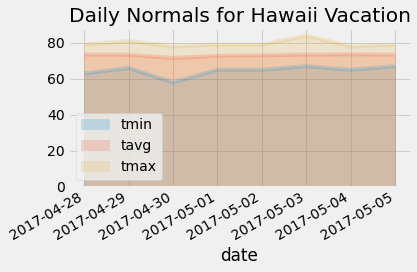

In [113]:
# Plot the daily normals as an area plot with `stacked=False`
daily_normals_df.plot(kind='area', alpha=.2, stacked=False, x_compat=True, title="Daily Normals for Hawaii Vacation")
plt.tight_layout()
plt.savefig("Resources/DailyNormals.png")
plt.show()